In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

#### Probability x Energy

In [8]:
beta = 1
cbm_energy = -0.5
spid_energy = -0.05

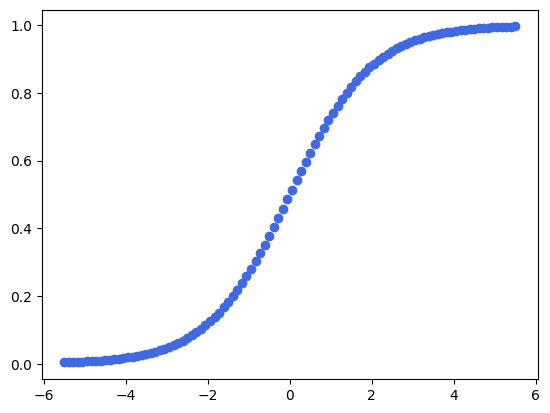

In [16]:
for cbm_count,spid_count in zip(np.linspace(-10,10,100),np.linspace(-10,10,100)):

    E = cbm_count*cbm_energy + spid_count*spid_energy
    P = 1/(1+np.exp(-E))
    plt.scatter(E,P,color='royalblue')

plt.show()

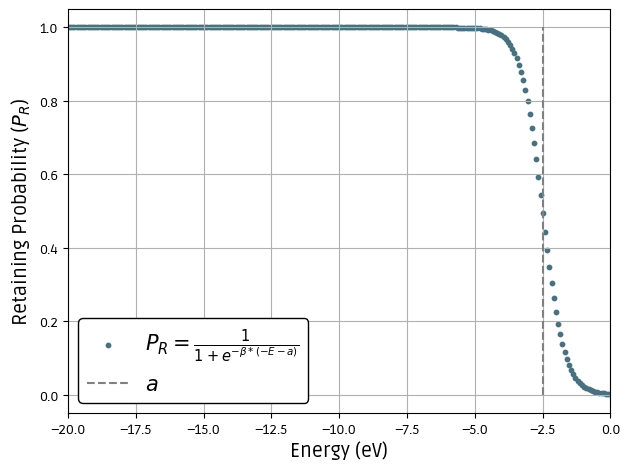

In [45]:
ps,es = [],[]
a = -2.5
b = 2.5

for E in np.linspace(-20,0,250):

    P = 1/(1 + np.exp(-b*(-E + a)))
    
    ps.append(P)
    es.append(E)
    
plt.scatter(es,ps,color='#477081',s=10,label=r'$ P_{R} = \frac{1}{1 + e^{-\beta*(-E - a)}}$')
plt.vlines(x=a,ymin=0,ymax=1,color='gray',linestyle='--',label='$a$')

plt.xlim(min(es),max(es))
# plt.ylim(min(ps),max(ps))

plt.xlabel('Energy (eV)',fontsize=14),plt.ylabel('Retaining Probability ($P_R$)',fontsize=14)
plt.legend(fontsize=15,edgecolor='black',framealpha=1,loc='lower left')
plt.grid(),plt.tight_layout()
# plt.savefig('results/sig.png',transparent=True,dpi=500)
plt.show()

#### Fiber creation

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

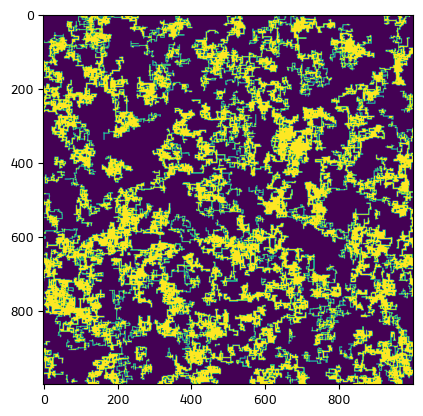

In [27]:
import numpy as np
import random

def criar_malha(dim, porosidade, diametro_max):
    matriz = np.zeros((dim, dim), dtype=int)    
    num_fibras = max(1, int((1 - porosidade) * dim))
    
    def adicionar_fibra(diametro):
        x, y = random.randint(0, dim-1), random.randint(0, dim-1)
        direcao = random.choice(['N', 'S', 'L', 'O'])
        
        for _ in range(random.randint(5, dim)):
            for dx in range(-diametro//2, diametro//2 + 1):
                for dy in range(-diametro//2, diametro//2 + 1):
                    if 0 <= x + dx < dim and 0 <= y + dy < dim:
                        matriz[x + dx, y + dy] = 1
            
            if direcao == 'N':
                x = max(0, x - 1)
            elif direcao == 'S':
                x = min(dim-1, x + 1)
            elif direcao == 'L':
                y = min(dim-1, y + 1)
            elif direcao == 'O':
                y = max(0, y - 1)
            
            if random.random() < 0.3:
                direcao = random.choice(['N', 'S', 'L', 'O'])

    for _ in range(num_fibras):
        diametro = random.randint(1, diametro_max)
        adicionar_fibra(diametro)
    
    return matriz

dim = 1000
porosidade = 0.5
diametro_max = 3
malha = criar_malha(dim, porosidade, diametro_max)

plt.imshow(malha)
plt.show()